# 🏡 Segmentación de Viviendas con KMeans
Este análisis utiliza KMeans para agrupar viviendas según características como precio, superficie y antigüedad.

In [ ]:
# Paso 1: Librerías necesarias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [ ]:
# Paso 2: Carga de datos (sube tu archivo CSV)
# Dataset sugerido: housing.csv
# URL = https://www.kaggle.com/datasets/camnugent/california-housing-prices/data
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.shape

(20640, 10)

| Columna              | Significado                                                              |
| -------------------- | ------------------------------------------------------------------------ |
| `longitude`          | Longitud geográfica de la zona (eje X del mapa).                         |
| `latitude`           | Latitud geográfica de la zona (eje Y del mapa).                          |
| `housing_median_age` | Edad mediana de las viviendas del sector (en años).                      |
| `total_rooms`        | Número total de habitaciones (no casas) en el sector.                    |
| `total_bedrooms`     | Número total de dormitorios en el sector.                                |
| `population`         | Cantidad total de personas que viven en ese sector.                      |
| `households`         | Cantidad total de unidades habitacionales (casas o departamentos).       |
| `median_income`      | Ingreso medio de los hogares en ese sector (en decenas de miles de USD). |
| `median_house_value` | Valor medio de las viviendas en ese sector (en USD).                     |
| `ocean_proximity`    | Proximidad del sector al océano. Valores posibles:                       |
|                      | - `"NEAR BAY"`: cerca de la bahía                                        |
|                      | - `"INLAND"`: interior (no costero)                                      |
|                      | - `"NEAR OCEAN"`: cerca del océano                                       |
|                      | - `"ISLAND"`: isla                                                       |
|                      | - `"<1H OCEAN"`: a menos de una hora del océano                          |


In [ ]:
df["bedrooms_per_household"] = df["total_bedrooms"] / df["households"]

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.081081


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               20640 non-null  float64
 1   latitude                20640 non-null  float64
 2   housing_median_age      20640 non-null  float64
 3   total_rooms             20640 non-null  float64
 4   total_bedrooms          20433 non-null  float64
 5   population              20640 non-null  float64
 6   households              20640 non-null  float64
 7   median_income           20640 non-null  float64
 8   median_house_value      20640 non-null  float64
 9   ocean_proximity         20640 non-null  object 
 10  bedrooms_per_household  20433 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               20433 non-null  float64
 1   latitude                20433 non-null  float64
 2   housing_median_age      20433 non-null  float64
 3   total_rooms             20433 non-null  float64
 4   total_bedrooms          20433 non-null  float64
 5   population              20433 non-null  float64
 6   households              20433 non-null  float64
 7   median_income           20433 non-null  float64
 8   median_house_value      20433 non-null  float64
 9   ocean_proximity         20433 non-null  object 
 10  bedrooms_per_household  20433 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


In [ ]:
# Paso 3: Selección y limpieza de variables
# Ejemplo de variables: price, area, year_built
variables = ['median_house_value', 'bedrooms_per_household', 'housing_median_age']
X = df[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

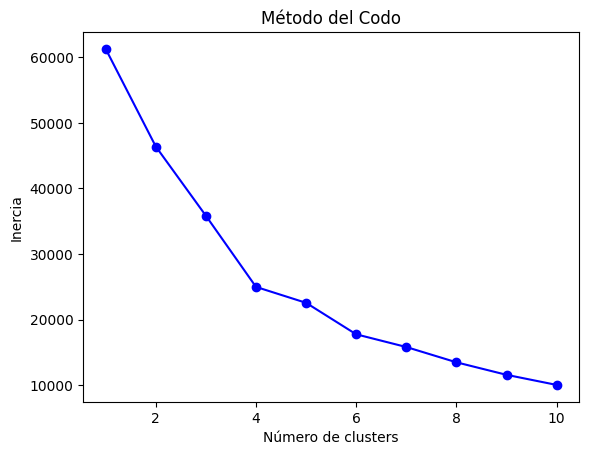

In [ ]:
# Paso 4: Método del Codo
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [ ]:
# Paso 5: Silhouette Score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}: silhouette_score={score:.3f}")

k=2: silhouette_score=0.323
k=3: silhouette_score=0.328
k=4: silhouette_score=0.383
k=5: silhouette_score=0.307
k=6: silhouette_score=0.310
k=7: silhouette_score=0.315
k=8: silhouette_score=0.305
k=9: silhouette_score=0.310
k=10: silhouette_score=0.323


Gráfico del Codo (Inertia vs. Clusters)

¿Qué mide? La inercia mide qué tan compactos son los clusters. Mientras más baja, mejor.

¿Dónde está el "codo"? Parece estar en k = 4. Después de ese punto, la mejora es más lenta.

✳️ Silhouette Score

¿Qué mide? Qué tan bien separados están los clusters entre sí. Va de -1 a 1. Mientras más alto, mejor.

Mejor resultado:

k = 4 tiene el mayor silhouette_score = 0.383, lo que refuerza lo que vimos en el codo.

✅ Conclusión

Tanto por método del codo como por silhouette score, el mejor número de clusters parece ser:

k = 4

In [ ]:
# Paso 6: KMeans con k óptimo (ej. k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Paso 7: Perfilamiento por cluster
df.groupby('Cluster')[variables].mean().round(2)

,median_house_value,bedrooms_per_household,housing_median_age
Cluster,,,
0,156223.69,1.05,38.34
1,169498.28,1.11,17.18
2,154159.03,7.39,18.69
3,401514.52,1.06,33.33


In [ ]:
# 🌐 Paso 8: Visualización 3D
fig = px.scatter_3d(df,
                    x='median_house_value',
                    y='bedrooms_per_household',
                    z='housing_median_age',
                    color='Cluster',
                    title='Clusters de viviendas')
fig.show()
#['median_house_value', 'bedrooms_per_household', 'housing_median_age']

In [ ]:
import plotly.express as px

fig = px.scatter(df,
                 x='median_house_value',
                 y='bedrooms_per_household',
                 color='Cluster',
                 title='Clusters de viviendas (2D)')
fig.show()


1. 📊 Valor vs. Dormitorios por hogar

Ejes:

x: median_house_value (valor medio de la vivienda)

y: bedrooms_per_household (dormitorios promedio por hogar)

¿Qué podrías observar?

Los valores más altos de vivienda tienden a estar en clusters con menos dormitorios por hogar.

Algunos puntos atípicos podrían ser viviendas con muchos dormitorios por hogar pero de bajo valor.

🧠 Pregunta guía:

¿Qué podría explicar que viviendas con menos dormitorios por hogar tengan mayor valor?

In [ ]:
fig = px.scatter(df,
                 x='median_income',
                 y='median_house_value',
                 color='Cluster',
                 title='Clusters por ingreso y valor de vivienda')
fig.show()


2. 📊 Ingreso vs. Valor de la vivienda

Ejes:

x: median_income (ingreso medio)

y: median_house_value (valor medio de la vivienda)

¿Qué muestra?

Se forma una relación positiva clara: a mayor ingreso, mayor valor de vivienda.

Un cluster se agrupa en la parte superior: viviendas más caras, posiblemente de zonas exclusivas.

🧠 Pregunta:

¿Qué cluster podría representar zonas de alto poder adquisitivo? ¿Y cuál zonas emergentes?

In [ ]:
fig = px.scatter(df,
                 x='longitude',
                 y='latitude',
                 color='Cluster',
                 title='Clusters de viviendas por ubicación geográfica')
fig.update_layout(yaxis_title='Latitud',
                  xaxis_title='Longitud')
fig.show()


3. 🗺️ Ubicación geográfica (mapa de California)

Ejes:

x: longitude

y: latitude

¿Qué se ve?

Puedes ver cómo se agrupan las viviendas geográficamente.

Algunos clusters dominan regiones específicas, por ejemplo zonas costeras (NEAR BAY) o más hacia el sur.

Pregunta:

¿Cómo se distribuyen los clusters geográficamente? ¿Qué zonas tienen viviendas de mayor valor?

In [ ]:
import plotly.express as px

# Asegúrate de tener el token si quieres usar Mapbox con estilo más detallado
# px.set_mapbox_access_token("TU_MAPBOX_TOKEN")

fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    color="Cluster",
    hover_name="median_house_value",  # o cualquier otra columna interesante
    zoom=5,
    height=600,
    title="Mapa de Clusters de Viviendas por Ubicación Geográfica",
    color_continuous_scale='Plasma'
)

fig.update_layout(mapbox_style="open-street-map")  # O usa "carto-positron", "white-bg", etc.
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()



# **Tabla resumen por cluster**

In [ ]:
# Supongamos que ya tienes una columna 'Cluster' en tu DataFrame
# y quieres analizar otras variables no usadas en KMeans

variables_para_analizar = ['median_income', 'population', 'total_rooms', 'households']

# Calculamos medias por cluster
df.groupby('Cluster')[variables_para_analizar].mean().round(2)


,median_income,population,total_rooms,households
Cluster,,,,
0,3.10,1192.19,1842.36,387.62
1,3.73,1755.64,3324.41,614.53
2,3.17,239.11,2881.89,99.67
3,5.88,1209.98,2819.54,491.40


Esto permite ver cómo se comportan las variables dentro de cada grupo que detectó KMeans.

Usando las medias que ves:

🟢 Cluster 3
* Ingreso más alto: 5.88
* Tamaño de población y hogares medianos
* Bastantes habitaciones

Podrías decir que este grupo representa zonas de ingresos altos, con población moderada y buen acceso a vivienda.

🔵 Cluster 2
* Muy poca población y hogares (239 personas en promedio)
* Pero muchas habitaciones (2881) 🤔

Puede sugerir zonas menos pobladas pero con muchas propiedades (¿casas vacías?, ¿zonas de veraneo?, ¿barrio consolidado con baja densidad?).

🟡 Cluster 1
* Mayor número de personas y hogares
* Más habitaciones también
* Ingreso no tan alto: 3.73

Podrías caracterizarlo como un grupo densamente poblado, pero de ingreso medio-bajo.

🔴 Cluster 0
* El ingreso más bajo: 3.10
* Baja cantidad de habitaciones y hogares

Posible grupo de zonas más vulnerables o con menos infraestructura habitacional.

# **Boxplot por variable**

/tmp/ipython-input-35170082.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




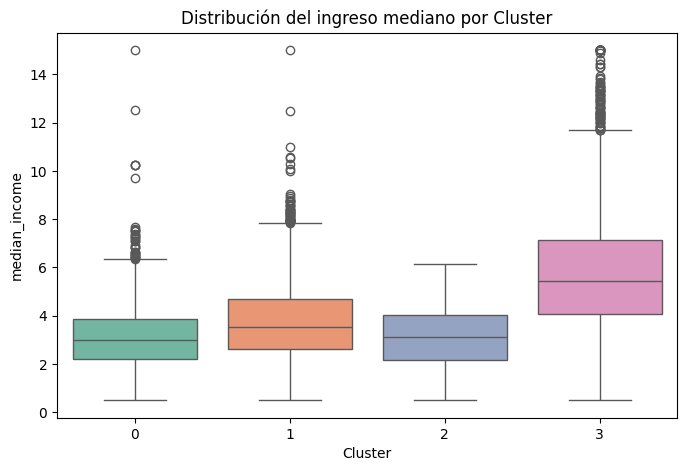

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de ingreso mediano por cluster
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cluster', y='median_income', palette='Set2')
plt.title('Distribución del ingreso mediano por Cluster')
plt.show()


Sirve para ver la dispersión y los valores atípicos de cada variable en cada cluster

Interpretación por cluster

Cluster 3 (color rosa):
* Ingreso claramente más alto y más disperso.
* Tiene muchos outliers por encima.
* Probable grupo de zonas más acomodadas o con mayor desigualdad interna.

Cluster 2 (azul):
* Ingreso más bajo.
* Baja dispersión.
* Grupo más homogéneo, de bajo ingreso.

Clusters 0 y 1:
* Intermedios, con ingresos similares.
* Cluster 1 tiene mayor variabilidad interna.

## **Gráfico de densidad**

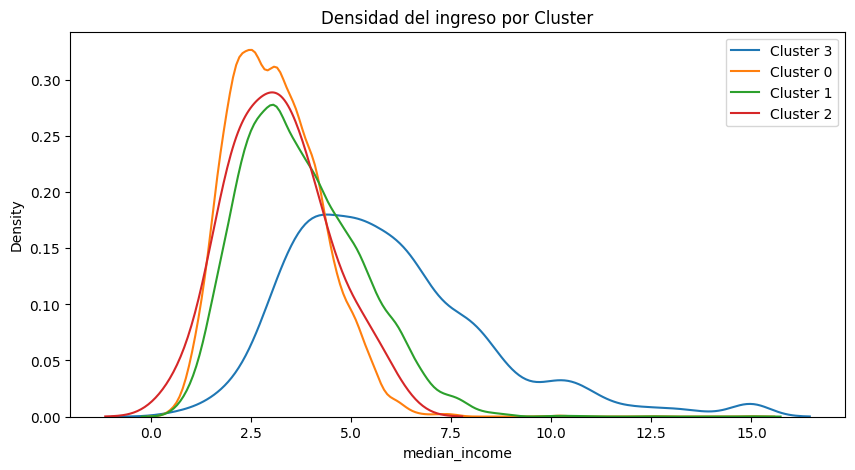

In [ ]:
plt.figure(figsize=(10, 5))
for cluster in df['Cluster'].unique():
    sns.kdeplot(data=df[df['Cluster'] == cluster], x='median_income', label=f'Cluster {cluster}')
plt.title('Densidad del ingreso por Cluster')
plt.legend()
plt.show()


Sirve para ver distribuciones suaves (como histograma pero más visual)

Cluster 3 (azul):

* Distribución más extendida, con un peak en torno a 6.
* Mayor ingreso mediano que el resto → grupo más acomodado.

Cluster 2 (rojo):

* Muy concentrado en valores bajos de ingreso.
* Distribución más “pobre” → puede representar zonas vulnerables.

Clusters 0 y 1 (naranja y verde):

* Distribuciones similares, con ingresos entre 2 y 4.
* Diferencias sutiles en el pico y la forma → posibles diferencias en tamaño o dispersión.
